# Lecture 4: Endogenous Grid Method
Consider the model from Lecture 3.

In this lecture, we consider an alternative solution method: the Endogenous Grid Method (EGM). This approach uses the curvature of the Euler equation:
\begin{align*}
    u^{\prime}\left(c_{t}\right)=\beta R\cdot\mathbb{E}\left[u^{\prime}\left(c_{t+1}\right)\right]
\end{align*}
If the Euler equation does not bind, the optimal choice is constrained, and $c_t=w_t$. 

Like before, the EGM works in a backward induction fashion, where we utilize that:
\begin{align*}
    c^*_{T} = w_T
\end{align*}

* Suppose we know the policy function  tomorrow, $c^*_{t+1}$, from previous steps of backward induction. 
* Suppose also, that we have an exogenous grid of savings $a_i\in\mathcal{G}_{a}$ with $a_1$ very close to zero (identifying hand-to-mouth consumers).
* For every point in the grid, we then compute the value of the state variable tomorrow at each node of the discretized shock distribution:
\begin{align*}
    w_{t+1} & =y_{t+1}l_{t+1}+R\cdot a_{t}
\end{align*}

We then find optimal consumption tomorrow at each shock node by interpolation over tomorrow's policy function which is now defined over a so-called endogenous grid, $\mathcal{G}_{w,t+1}$:
\begin{align*}
    c_{t+1}^{*}\left(w_{t+1}\right)=interp\left(\mathcal{G}_{w,t+1},c_{t+1}^{*}\left(\mathcal{G}_{w,t+1}\right),w_{t+1}\right)
\end{align*}
In the last period of life, the endogenous grid is really exogenous, but as we go backward in time, it evolves according to optimal decisions. To account for the borrowing constraint and to allow for hand-to-mouth consumers, we interpolate over the following grids:
\begin{array}{ccccccc}
c_{t+1}^{*} & = & 0 & c_{t+1,1} & c_{t+1,2} & \ldots & c_{t+1,\#}\\
\mathcal{G}_{w,t+1} & = & 0 & w_{t+1,1} & w_{t+1,2} & \ldots & w_{t+1,\#}
\end{array} 
As $c_1$ is the lowest consumption level for which the individual is non-constrained, anyone with $w_t<w_{t+1,1}$ is credit constrained.

We then compute associated current consumption via the Euler equation:
\begin{align*}
    c_{t}= u^{\prime}\left(\beta R\cdot\mathbb{E}\left[u^{\prime}\left(c_{t+1}^{*}\left(w_{t+1}\right)\right)\right]\right)^{-1}
\end{align*}
and find the endogenous state $w_{t,i} = a_{t,i} + c_{t,i}$ to create the endogenous grid for the current period $\mathcal{G}_{w,t}$.

In [1]:
# Setting Parameters
import numpy as np
import Tools as tools
import ModelFunctions as model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import time

np.set_printoptions(suppress=True)

""" Setting parameters """ 
par = dict()

# Setting model-specific parameters
par['T'] = 6
par['r'] = 4
par['R'] = 1.2
par['β'] = 1/par['R']
par['ρ'] = 2
par['l'] = np.concatenate((np.ones(par['r']),np.zeros(par['T'] - par['r'])))
par['μ'] = 0
par['σ'] = 0.5

# Load Gauss-Hermite weights and nodes
par['S'] = 7
par['x'],par['wi'] = tools.gauss_hermite(par['S'])
par['ω'] = par['wi']/np.sqrt(np.pi)

# Compute the discretized shock vector
par['Y'] = np.exp(par['σ']*np.sqrt(2)*par['x'])  
par['Y'] = par['Y'].flatten()

# Creating a grid for cash-on-hand
par['a_max'] =  5
par['gridsize_a'] = 1000 # State 1: Cash-on-hand

par['𝒢_a'] = np.linspace(10e-6,par['a_max'],par['gridsize_a'])
par['𝒢_w_det'] = np.linspace(10e-6,par['a_max'],par['gridsize_a']+1)

## Solving the Model by EGM
We solve the model using [Model](ModelFunctions.py) > solve()

To see that the EGM algorithm is faster than the standard method, we solve the model and time it:

In [2]:
t0 = time.time()
𝒢_w,Cstar = model.solve(par)
t1 = time.time()
print('Time to solve:',t1-t0)

5
4
3
2
1
0
Time to solve: 0.18483662605285645


## A Small Exercise
Try to plot the policy function in some period against the relevant endogenous grid:

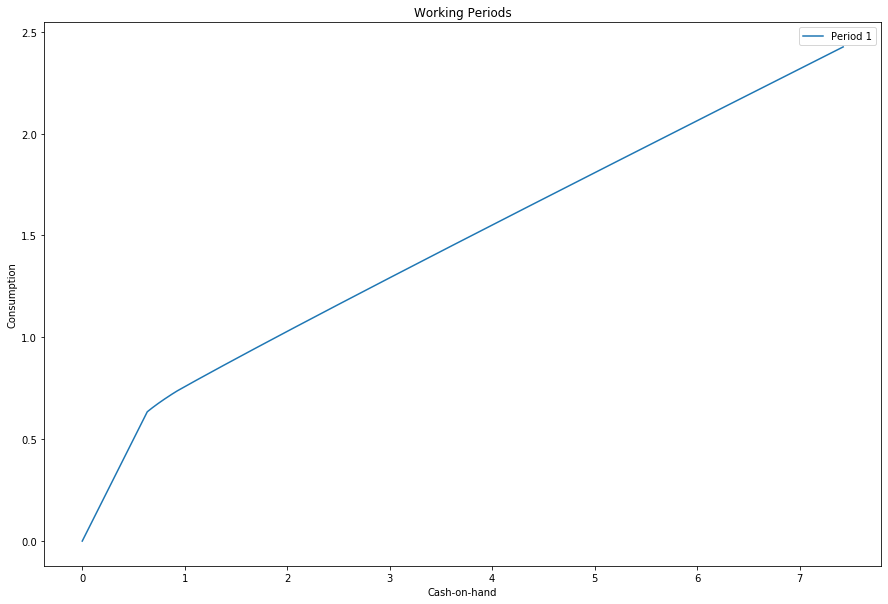

In [7]:
plt.plot(𝒢_w[0,:],Cstar[0,:])
plt.title('Working Periods')
plt.xlabel("Cash-on-hand")
plt.ylabel("Consumption")
plt.gca().legend(('Period 1','Period 2','Period 3','Period 4'))
plt.show()